# Лабораторная работа
Цель: Построить модели и сделать на их основе предсказания

Импортируем библиотеки

In [799]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
from matplotlib import pylab as plt
from math import sqrt, sin, cos, log, exp

In [800]:
data = pd.read_csv("WhiteBreadPrices.csv", header = None)

In [801]:
data.head()

,0,1
0,0.27723,0.000000
1,0.29703,0.005155
2,0.21782,0.010309
3,0.12871,0.015464
4,0.31683,0.020619


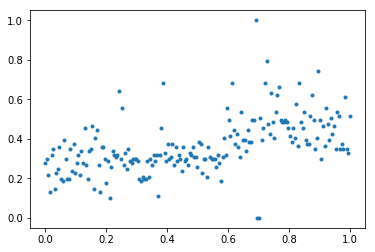

In [802]:
plt.plot(data[1], data[0], '.')

К сожалению, я не смог понять, что здесь от чего зависит. Судя по названию файла, одно из этого - цена на белый хлеб. Тем не менее, во избежание недоразумений, абстрагируемся от земных сущностей и будем смотреть это просто как на некоторое отображение из [0, 1] в [0, 1]. Реализуем три ф-ции. mserror считает среднеквадратичное отклонение нашего прогноза от данного на обучающей выборке. find_coeffs принимает на вход матрицу признаков и предсказаний для обучающей выборки, возвращает вектор весов. Ф-ция control печатает среднеквадратичную ошибку, среднее значение предсказания на обучающей выборки и их отношение, а также рисует графики.

In [803]:
def mserror(y, y_pred):
    return np.mean((y - y_pred)**2)**0.5

def find_coeffs(X, y):
    w = np.dot(np.linalg.pinv(X), y)
    return w

def control(X, y, w, data_x = None, data_y = None, show_plot=False):
    y_pred = np.dot(X, w)
    print round(mserror(y, y_pred), 3)
    print round(y.mean(), 3)
    print round(mserror(y, y_pred)/y.mean(), 2)
    if show_plot:
        plt.plot(data_x, y_pred, color = 'red')
        plt.plot(data_x, y_pred - [mserror(y, y_pred)]*len(y_pred), 'b-')
        plt.plot(data_x, y_pred + [mserror(y, y_pred)]*len(y_pred), 'b-')
        plt.fill_between(data[1], y_pred - [mserror(y, y_pred)]*len(y_pred),  y_pred + [mserror(y, y_pred)]*len(y_pred), color = 'yellow')
        plt.plot(data_x, data_y, '.', color = 'blue')
        plt.grid()
        plt.show()

In [804]:
y = np.array(data[0])

0.118
0.365
0.32


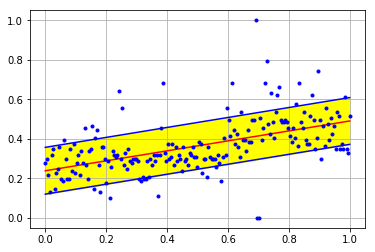

In [805]:
X = np.array([[x] for x in data[1]])
X = np.append(X, np.ones((len(X), 1)), axis = 1)
w = find_coeffs(X, y)
control(X, y, w, data[1], data[0], True)

0.113
0.365
0.31


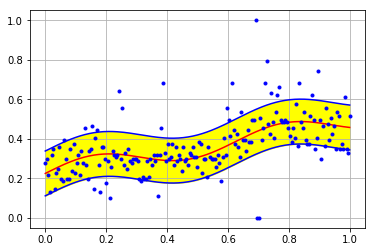

In [806]:
X = np.array([[x, sin(x*10)] for x in data[1]])
X = np.append(X, np.ones((len(X), 1)), axis = 1)
w = find_coeffs(X, y)
control(X, y, w, data[1], data[0], True)

0.113
0.365
0.31


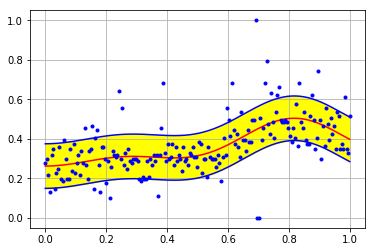

In [807]:
X = np.array([[x, x**2, x*sin(x*10), x*log(x+1)] for x in data[1]])
X = np.append(X, np.ones((len(X), 1)), axis = 1)
w = find_coeffs(X, y)
control(X, y, w, data[1], data[0], True)

Судя по всему, признаков x, sin(10x) вполне хватает, добавление чего-то еще слабо меняет картину. sin(10x) взят из тех соображений, что на отрезке 0, 1 sinx монотонно возрастает, что делает его менее функциональным (и вообще схожим с просто ф-цией y = x). Действительно, давайте посмотрим, что будет, если взять sin(x) и убедимся, что x, sin(x) мало чем отличается от просто x.

0.118
0.365
0.32


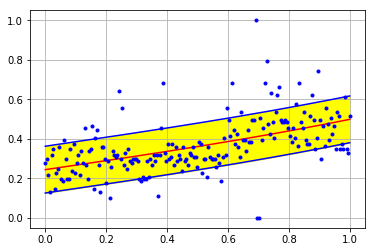

In [809]:
X = np.array([[x, sin(x)] for x in data[1]])
X = np.append(X, np.ones((len(X), 1)), axis = 1)
w = find_coeffs(X, y)
control(X, y, w, data[1], data[0], True)

Перейдем ко второй части.
Загружаем файл с данными. Т.к. нам предоставлены данные за один год, будем смотреть лишь на остатки по модулю 365.
Если бы был дан более длинный период, то можно было бы попытаться учитывать еще и год, ведь с годами численность населения может расти или падать, что отразится и на потреблении электроэнергии.

In [810]:
data = pd.read_excel("EnergyConsumption.xls")
data.Hour = [x.hour for x in data.Hour]
data.Date = [x.toordinal()%365 for x in data.Date]

Посмотрим, как потребление зависит от признаков.

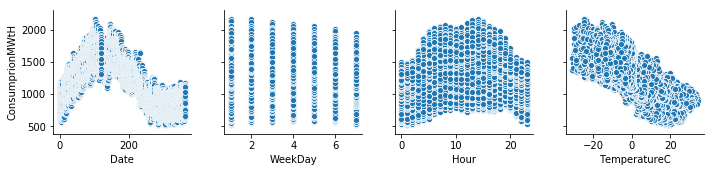

In [811]:
sns.pairplot(data, x_vars = ['Date', 'WeekDay', 'Hour', 'TemperatureC'], y_vars=['ConsumprionMWtH'])

Пусть Х - матрица признаков. Рассмотрим несколько моделей. 

In [812]:
y = np.array([x[3] for x in data.to_numpy()])
X = np.array([[x[0], x[1], x[2], x[4]] for x in data.to_numpy()])
X = np.append(X, np.ones((len(X), 1)), axis = 1)
w = find_coeffs(X, y)
control(X, y, w)

213.918
1234.852
0.17


In [813]:
X = np.array([[x[0], x[0]*log(x[0] + 1), x[1], x[1]*log(x[1]), x[2], x[2] * log(x[2] + 1), x[4], x[4]*log(x[4]**2)] for x in data.to_numpy()])
X = np.append(X, np.ones((len(X), 1)), axis = 1)
w = find_coeffs(X, y)
control(X, y, w)

116.744
1234.852
0.09


In [814]:
X = np.array([[x[0], x[0]*cos(x[0]/280), x[1], x[1]*sin(x[1]/50), x[2], x[2]*x[2]*sin(x[2]/10), x[4], x[4]*sin(x[4]/50)] for x in data.to_numpy()])
X = np.append(X, np.ones((len(X), 1)), axis = 1)
w = find_coeffs(X, y)
control(X, y, w)

160.225
1234.852
0.13


In [815]:
X = np.array([[x[0]**0.5, (x[0]**0.1)*log(x[0] + 1), x[1], x[1]*log(x[1]), x[2]**2, (x[2]**0.7)*log(x[2]**7 + 1), sin(x[2]**10)**3, x[4], x[4]*log(x[4]**2 + 1)] for x in data.to_numpy()])
X = np.append(X, np.ones((len(X), 1)), axis = 1)
w = find_coeffs(X, y)
control(X, y, w)

100.719
1234.852
0.08


Как видим, в последней модели нам удалось достигнуть не такого уж плохого результата (степени подбирались долго и нудно, методом научного тыка). Вероятно, можно и еще лучше. Посмотрим на графики.

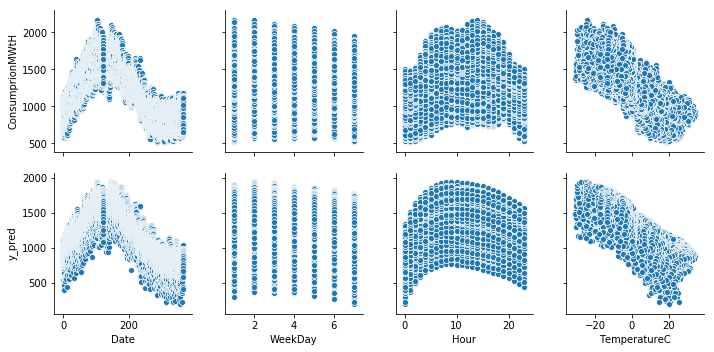

In [816]:
data['y_pred'] = y_pred
sns.pairplot(data, x_vars = ['Date', 'WeekDay', 'Hour', 'TemperatureC'], y_vars=['ConsumprionMWtH', 'y_pred'])

Как видим, зависимость от признаков воссоздана вполне неплохо, определенное сходство налицо. Посмотрим, как истинный ответ зависит от предсказанного.

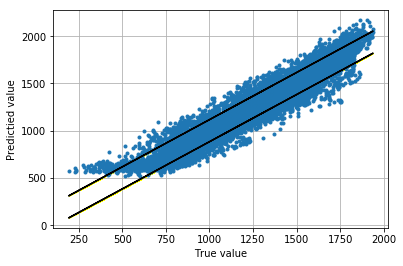

In [817]:
fig, ax = plt.subplots()
ax.set_xlabel('True value')
ax.set_ylabel('Predictied value')
plt.plot(data.y_pred, data.ConsumprionMWtH, '.')
plt.plot(data.y_pred, y_pred - [mserror(y, y_pred)]*len(y_pred), 'b-', color = 'black')
plt.plot(data.y_pred, y_pred + [mserror(y, y_pred)]*len(y_pred), 'b-', color = 'black')
plt.fill_between(data.y_pred, y_pred - [mserror(y, y_pred)]*len(y_pred),  y_pred + [mserror(y, y_pred)]*len(y_pred), color = 'yellow')
plt.grid()
plt.show()

Довольно неплохо. Что ж, можно сделать вывод, что данная модель является вполне удовлетворительной.